In [1]:
import PIL
import ephem
import datetime
import matplotlib         as    mpl
import pylab              as    pl
import numpy              as    np
import matplotlib.pyplot  as    plt
import matplotlib.patches as    patches

from   IPython.display   import Image
from   matplotlib        import animation, rc
from   IPython.display   import HTML
from   PIL               import Image as PImage
from   IPython.display   import YouTubeVideo

In [2]:
%matplotlib inline

# De los Mayas a DESI

Desde el 1800 a. C. hasta el 900 d. C., la civilización Maya se destacó en agricultura, alfarería, escritura de jeroglíficos, elaboración de calendarios y matemáticas. Localizados en los actuales Honduras, México, Guatemala y Belice, y con un legado asombroso de arquitectura y obras de arte simbólicas, su formidable entendimiento de los cielos es quizá lo más impresionante, ¡sin duda para nosotros!

Los mayas eran expertos observadores del cielo; espectadores cuidadosos de los movimientos de los cuerpos celestes. Una prueba de la fascinación maya por la astronomía está tallada en piedra en los grandes sitios arquitectónicos de Chichén Itzá, Uxmal, Uaxactun, Edzna, Palenque y muchos más. Como veremos, a menudo los edificios que adornan se han construido para alinearse con eventos astronómicos cíclicos significativos: solsticios, equinoccios, la luna cambiante o el pasar de los planetas.

<img src="images/ChichenItza.jpg" alt="Drawing" style="width: 800px;"/>

En Chichén Itzá, dos estructuras dan testimonio de la astronomía maya: Kukulkan y El Caracol. Kukulkan, o El Castillo, es una pirámide de piedra en el centro de Chichén Itzá de 79 pies (24 m). Cada año, decenas de miles de visitantes acuden en masa a Chichén Itzá para ver 'la serpiente', una aparición hecha de sombras que desciende por las escaleras de El Castillo durante los equinoccios solares de cada primavera y otoño.

Este famoso evento ocurre dos veces al año, en los equinoccios de primavera y otoño. (De hecho, el efecto se puede ver durante una semana antes y después de cada equinoccio). A medida que se pone el sol del equinoccio, un juego de luces y sombras crea la apariencia de una serpiente que se ondula gradualmente por las escaleras de la pirámide. Esta serpiente con espalda de diamante se compone de siete sombras triangulares, proyectadas por las terrazas escalonadas de la pirámide. El sol poniente parece dar vida a las sinuosas sombras, que trazan un patrón decididamente serpenteante en su camino por las escaleras.

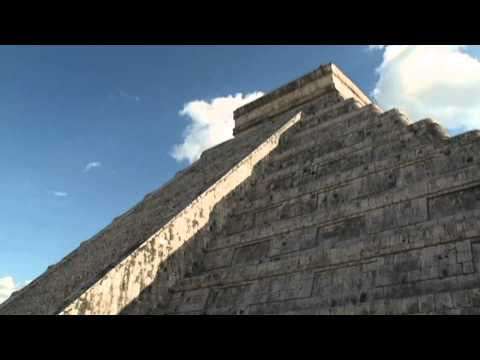

In [4]:
YouTubeVideo('Zvv9EnBuem4', width=800, height=400)

Usando el increíble paquete Ephem, ¡veamos cómo funciona esto! Primero definiremos nuestro sol y el planeta favorito de los mayas, Venus. Estas 'class instances' nos permiten, por ejemplo, preguntar más adelante en qué posición se encuentra el sol en un momento dado.

In [3]:
venus = ephem.Venus()
sun   = ephem.Sun()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec, ephem.constellation(venus)[1])

8:28:58.50 17:51:55.0 Cancer


¡Entonces Venus está en la constelación de Cáncer esta noche! También definimos la posición (latitud y longitud de nuestro astrónomo maya). Las coordenadas predeterminadas del _Mayastronomer_ son las de El Castillo en Chichen Itza, pero ten la libertad de elegir las tuyas.

In [4]:
mayastronomer         = ephem.Observer()

# Latitud y longitud ordinarias del astronomo Mayan. Por defecto las coordinates son las de El Castillo en Chichen Itza.
mayastronomer.lat     = '20.683056'
mayastronomer.lon     = '-88.568611'

# 
mayastronomer.horizon = 0.0

Ahora, descubramos más sobre la posición del Sol para diseñar nuestra pirámide. Definamos las siguientes funciones que calculan el ángulo azimutal en el que el Sol se pone o sale en el horizonte durante los dos equinoccios (cuando el día y la noche duran lo mismo) o los dos solsticios (el día con la noche más larga o más corta del año).

In [5]:
def solar_position(year, date=None, event="next_rise", ephem_event=ephem.next_equinox):
    if date != None:
        # Regresa la posición del sol en un evento de fecha conocida
        mayastronomer.date = date
        
        sun.compute(mayastronomer)
        
        return  sun.az, sun.alt 
               
    else:
        # Determina el día y la posición azimutal del sol para un evento dado, ej. solsticio o equinoccio. 
        if event == "next_rise":
            mayastronomer.date = mayastronomer.next_rising(sun, start=ephem_event(year), use_center=True)

        elif event == "prev_setting":
            mayastronomer.date = mayastronomer.previous_setting(sun, start=ephem_event(year), use_center=True)
    
        elif event == "next_setting":
            mayastronomer.date = mayastronomer.next_setting(sun, start=ephem_event(year), use_center=True)
        
        else:
            raise  ValueError("Evento inaceptable!")
        
        sun.compute(mayastronomer)
 
        return  ephem.localtime(mayastronomer.date), sun.az

Elige un año (para construir / visitar tu pirámide) y evaluemos las funciones previamente definidas en ese año.

In [6]:
year                 = '2021'

saz, salt            = solar_position(date='551/12/22 16:45:40', year='2021')

# Hora y posición azimutal del sol naciente y poniente en el equinoccio - día en el que duración de la noche = duración del día.
equinox_rise         = solar_position(year, event="next_rise", ephem_event=ephem.next_equinox)
equinox_set          = solar_position(year, event="prev_setting", ephem_event=ephem.previous_equinox)

# Hora y posición azimutal del sol naciente y poniente en el solsticio de invierno, el día más corto del año.
winter_solstice_set  = solar_position(year, event="next_setting", ephem_event=ephem.previous_solstice)
winter_solstice_rise = solar_position(year, event="next_rise", ephem_event=ephem.previous_solstice)

# Hora y posición azimutal del sol naciente y poniente en el solsticio de verano, el día más largo del año.
summer_solstice_set  = solar_position(year, event="next_setting", ephem_event = ephem.next_solstice)
summer_solstice_rise = solar_position(year, event="next_rise", ephem_event = ephem.next_solstice)

Antes de elaborar un diseño de pirámide, aprendamos más sobre la pirámide original que queremos imitar. La estructura del Castillo en su conjunto parece estar alineada con un eje astronómico importante: el plano oeste de la pirámide hace frente al pasaje cenital durante el atardecer. Mientras tanto, cada una de las cuatro escaleras (extremadamente empinadas) que suben a la pirámide tiene 91 escalones, con un escalón final en la parte superior para un total de 365, la cantidad de días en un año solar. Noventa y uno es también el número de días que separan cada una de las cuatro fases del ciclo solar anual: solsticio de invierno, equinoccio de primavera, solsticio de verano y equinoccio de otoño.

Necesitamos algunas líneas rectas y la forma aérea de nuestra pirámide, así que algunas definiciones más.

In [29]:
#Ecuación de la línea recta
def line(x,m):
    return np.tan(-m+np.pi/2)*x


#Dibuja una linea y su descripción
def draw_lines(x,y,text=None):
    for i in range(3):
        ax.plot(x,y[i])
        
        ax.scatter(x[4],y[i][4],marker='o',color='black')
        ax.scatter(x[25],y[i][25],marker='o',color='black')
        
        if text!=None:
            ax.text(x[4]+5,y[i][4]+1,text[i][0], ha='center')
            ax.text(x[25]-5,y[i][4]+1,text[i][1], ha='center')

#Dibuja el Castillo 
def draw_kukulkan(ax):
    for i in range (2,10):
        j=12-i
        if (j==3):rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='black', alpha=0.5)
        else: rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='red', alpha=0.2)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)
            #ax.add_patch(rectangle2)

    for i in range (4):
        a=[[-1.5,3],[-1.5,-11],[3,-1.5],[-11,-1.5]]
        if i<=1:rectangle=patches.Rectangle((a[i]),3,8, color='black', alpha=0.5)
        else:rectangle=patches.Rectangle((a[i]),8,3, color='black', alpha=0.5)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)

Ahora calculemos el ángulo relevante para nuestro diseño y algunas trayectorias de rayos de luz durante la puesta de sol.

In [27]:
x         = np.linspace(-30,30,30)
y         = [line(x,equinox_rise[1]),line(x,summer_solstice_set[1]),line(x,summer_solstice_rise[1])]

angle     =(-summer_solstice_rise[1]+np.pi/4)/np.pi*180
anglerad  = -summer_solstice_rise[1]+np.pi/4

rayshighx = np.array([x[4],10*(-np.cos(anglerad)-np.sin(anglerad))])
rayshighy = np.array([y[2][4],10*(np.cos(anglerad)-np.sin(anglerad))])
rayslowx  = np.array([x[4],10*(np.cos(anglerad)+np.sin(anglerad))])
rayslowy  = np.array([y[2][4],10*(-np.cos(anglerad)+np.sin(anglerad))])

Antes de colocar el diseño de la pirámide, necesitamos la referencia de solisticios y equinoccios en la posición del Mayastrónomo.

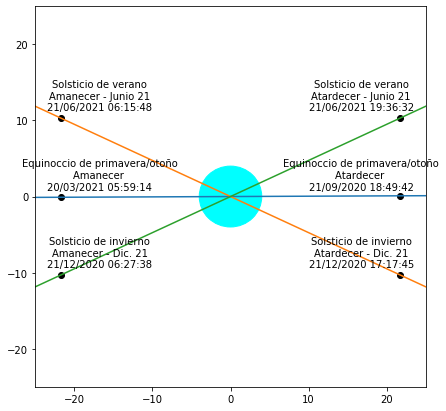

In [43]:
fig1,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
text=[["Equinoccio de primavera/otoño\nAmanecer \n%s"%equinox_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Equinoccio de primavera/otoño\nAtardecer \n%s" %equinox_set[0].strftime("%d/%m/%Y %H:%M:%S")],
     ["Solsticio de verano\nAmanecer - Junio 21\n%s"%summer_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de verano\nAtardecer - Junio 21\n%s"%summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S")],
    ["Solsticio de invierno\nAmanecer - Dic. 21\n%s"%winter_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de invierno\nAtardecer - Dic. 21\n%s" %winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S")]]

draw_lines(x,y,text=text)
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
plt.show()

Hora de colocar el diseño de la pirámide en el sitio y alinearlo con el eje del solsticio de invierno.

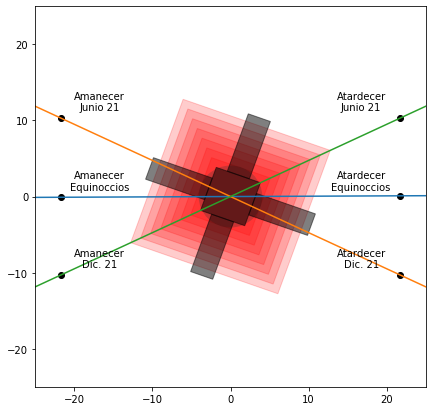

In [45]:
fig2,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

#lineas de referencia
text=[["Amanecer\nEquinoccios","Atardecer\nEquinoccios"],
      ["Amanecer\nJunio 21","Atardecer\nJunio 21"],["Amanecer\nDic. 21","Atardecer\nDic. 21"]]
draw_lines(x,y,text=text)

#Dibujar pirámide
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_kukulkan(ax=ax)

plt.show()

Observe los rayos de luz del sol en la puesta del sol del solsticio de invierno.

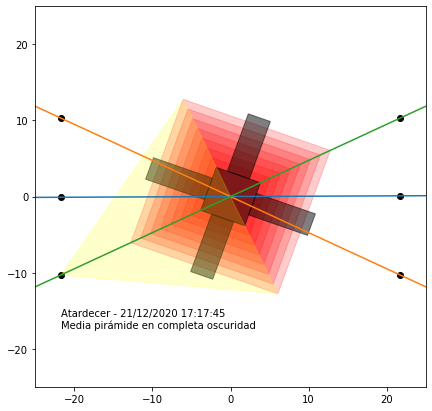

In [46]:
fig3,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

#lineas de referencia
for i in range(3):
    ax.plot(x,y[i])
    ax.scatter(x[4],y[i][4],marker='o',color='black')
    ax.scatter(x[25],y[i][25],marker='o',color='black')

#Dibujar pirámide
draw_kukulkan(ax=ax)

#Dibujar rayos de luz
ax.fill(np.append(rayshighx, rayslowx[::-1]),np.append(rayshighy, rayslowy[::-1]), color='yellow', alpha=0.2)
ax.text(x[4],y[2][4]-7,"Atardecer - %s\nMedia pirámide en completa oscuridad" %winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))
plt.show()

Ahora el famoso espectáculo: cuando el sol se pone en los equinoccios de primavera y otoño, Kukulkan (que significa _serpiente emplumada_ en maya) desciende por la escalera norte.

Text(-21.724137931034484, 15.311100872526994, 'Sunset - 21/06/2021 19:36:32\nThe seven triangles of light')

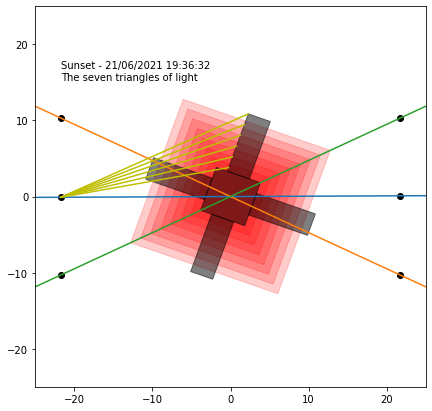

In [40]:
fig4,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

#line references
for i in range(3):
    ax.plot(x,y[i])
    ax.scatter(x[4],y[i][4],marker='o',color='black')
    ax.scatter(x[25],y[i][25],marker='o',color='black')
    
#Draw pyramid
draw_kukulkan(ax=ax)

#Draw light rays
for i in range(6):
            raystairsx=np.array([x[4],-1.5*np.cos(anglerad)-(11-i*1.5)*np.sin(anglerad)])
            raystairsy=np.array([y[0][4],(11-i*1.5)*np.cos(anglerad)-1.5*np.sin(anglerad)])
            ax.plot(raystairsx,raystairsy,'y-')
            
ax.text(x[4],y[1][4]+5,"Sunset - %s\nThe seven triangles of light" %summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))
plt.show()

Finally, let's see how your design compares to Kukulkan's pyramid. Does it move much from El Castillo? go back to set new coordinates for the _mayastronomer_, including locations in the norht/south hemisphere. When do you get a significant difference?

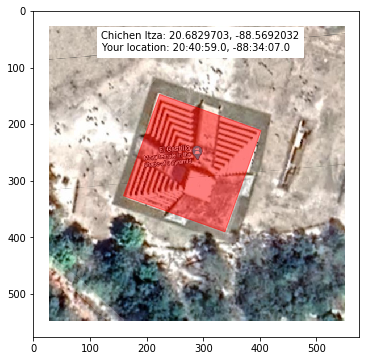

In [42]:
fig5,ax= plt.subplots(figsize=(7,6))

img= plt.imread("images/kukulkan.png") #original Chichen Itza image from Google maps
ax.imshow(img)

#Alignment of your pyramid design
rectangle=patches.Rectangle((188,178),190,190, color='red', alpha=0.5) 
t = mpl.transforms.Affine2D().rotate_deg_around(294,264,-angle+0*45) + ax.transData
rectangle.set_transform(t)
ax.add_patch(rectangle)

ax.text(120,70,"Chichen Itza: 20.6829703, -88.5692032\nYour location: {}, {}".format(mayastronomer.lat, mayastronomer.lon), backgroundcolor='white')
plt.show()

Minutes walk from Kukulkan, 'El Caracol' Obseravatory was central to the serious business of Mayan Astronomy, where observations of Venus were of (almost) religious importance.

<img src="images/caracol.jpg" alt="Drawing" style="width: 800px;"/>

Caracol, like Kukulkan, was carefully aligned with the motions of Venus as 'he' (for the Mayans) held tremendous significance; this bright planet was considered the sun’s twin and a war god. Mayan leaders used the changing position of Venus to plan appropriate times for raids and battles.  At El Caracol, dubbed 'the observatory', narrow shaftlike windows frame important astronomical events. One such window marks an appearance of Venus at a particular point on the horizon that takes place—like clockwork—once every eight years.

Let's use ephem to observe and understand Venus, as the Mayans once did at Caracol.

In [16]:
# First rising date time:  2020/1/2 03:01:29
# First sun rise;  print(chichen_itza.previous_rising(sun))

# Define our first observation on 1st January 2020, at 23:52 and a bit!
start_date         = datetime.datetime(2020, 1,   1)
start_time         = datetime.time(23, 52, 2)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

# We'll calculate the positions of Venus up until 2030. 
end_date           = datetime.datetime(2030, 1, 1)

# every hour. 
delta              = datetime.timedelta(hours=1)

# Store the date and time of 'each observation'.
datetimes          = []

# Store the angular position. 
angular_pos        = []

# Will store the [magnitude (brightness), diameter in arcseconds, distance from the Earth, phase, and separation
# of Venus from the sun in degrees (elongation or elong)].
props              = []

# Store the time of sunrise on each day. 
sunrises           = []

while start_datetime  <= end_date:    
    start_datetime += delta
    
    # Set our date and time of observation. 
    mayastronomer.date    = start_datetime.strftime("%Y/%m/%d %H:%M:%S")

    # Calculate everything for the sun and Venus. 
    sun.compute(mayastronomer)
    venus.compute(mayastronomer)
    
    datetimes.append(start_datetime)

    props.append([venus.mag, venus.size, venus.earth_distance, venus.phase, venus.elong])
    
    # alt or altitude is the height of the sun and Venus above the horizon in degrees.  An altitude of 90 deg. would 
    # be right above you!  This is also known as the 'zenith' amongst the pros. 
    angular_pos.append([mayastronomer.date, sun.alt, venus.az, venus.alt])

    sunrises.append(mayastronomer.previous_rising(sun))
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [17]:
# We've been collecting things in 'lists', but convert to numpy arrays as much easier to do calculations.
angular_pos = np.array(angular_pos)
props       = np.array(props)
sunrises    = np.array(sunrises)

In [18]:
# Convert from randians to degrees.
angular_pos[:,1:] *= 180. / np.pi

In [19]:
# Sunrises is a series of numbers that represent the date and time of the observation, with a bigger number being a 
# later observation.  Here, we're going to start are clock at the time when we see venus and the sun are closely together.
sunrises   -= 44567

In [20]:
# A list of the colors for the lines we will plot.
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(567, 0.75, 'Inferior \n Conjunction')

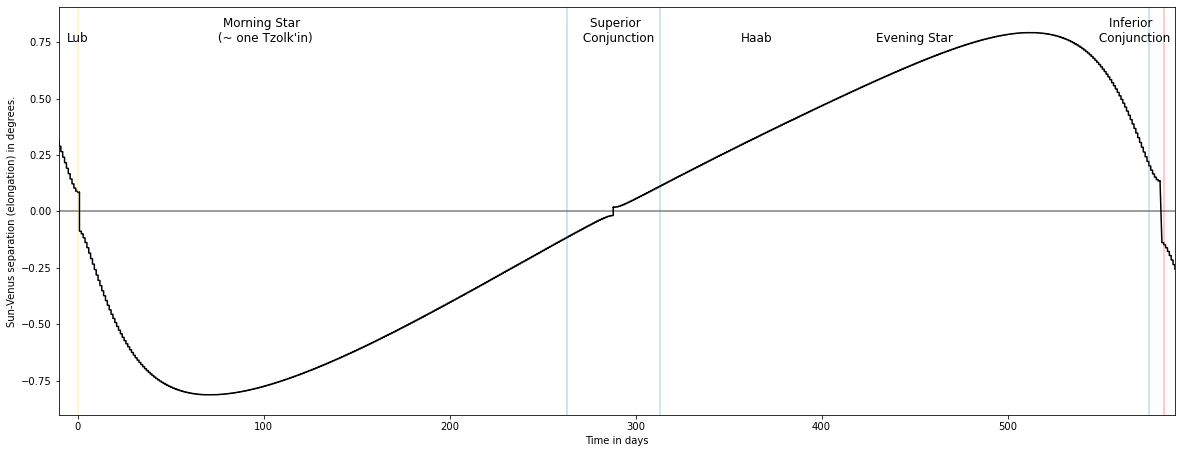

In [21]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, props[:,-1], c='k')
    
ax.set_xlabel('Time in days')
ax.set_ylabel('Sun-Venus separation (elongation) in degrees.')

ax.set_xlim(left=-10, right=590)
    
ax.axhline(0.0, alpha=0.5, c='k')
    
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
ax.text(x=0,   y=0.75, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=0.75, s='Morning Star \n (~ one Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=0.75, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=0.75, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=0.75, s='Evening Star', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=0.75, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)
    
# pl.savefig('images/venus.pdf')

For the Mayans, this was an incredibly special curve!  So much so, they designed (one of) their calendars, the Tzolk'in, based on it!  This calendar would start on the Lub, when venus was so close to the sun ('elongation' $\simeq 0.0$) that it would be hidden completely.  Soon, as you watched the horizon close to sunrise each day, Venus would become a 'Morning Star' - Venus would rise above the horizon up to a few hours before the brightness of the Sun rise would drown it out.  Why not wake up early one day and see!

Venus would continue to be a Morning Star for 263 days, at which point the paths of the Sun and Venus would be so close each day that the Sun's brightness would shield it completely.  In amateur and professional astronomy, this is known as the 'Superior Conjunction', which lasts for 50 days.  The 263 days duration of the Morning Star would go on to define the Tzolk'in year. 

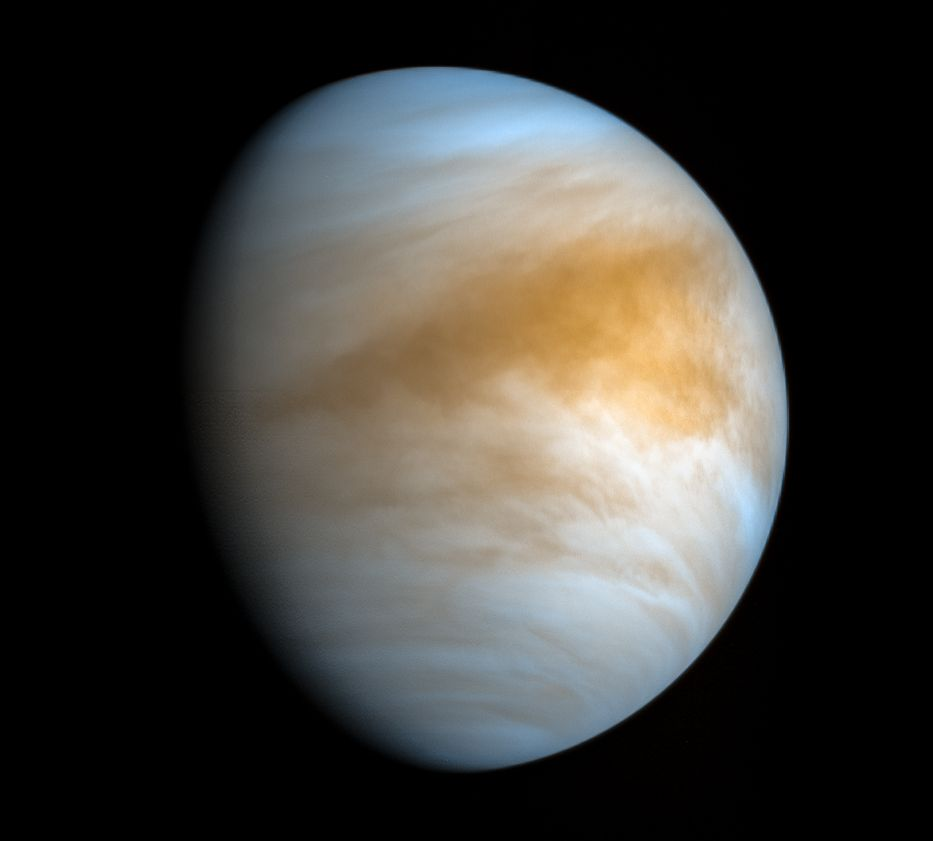

In [22]:
Image(filename='images/venus.jpg')

We're now 365 days in, a year to us or a Haab to the Mayans!  By this point, Venus is an 'Evening star':  now on the other side of the Sun, it’s trailing the Sun in the sky and brightens into view shortly after the Sun sets, when the sky is dark enough for it to be visible. When Venus is at its brightest, it becomes visible just minutes after the Sun goes down.

The `Inferior conjuntion' closes out the 'synodic period' of Venus, exactly the same as the superior but for a much shorter 8 days.  At the end of the synodic period, 584 days, Ground Hog day begins again for Venus as everything then repeats!

So complicated is Venus’s disappearing act that the ancient Greeks misconstrued it as two different stars. The Mayans knew better, and they recognized Venus in both the morning and evening skies as one and the same.

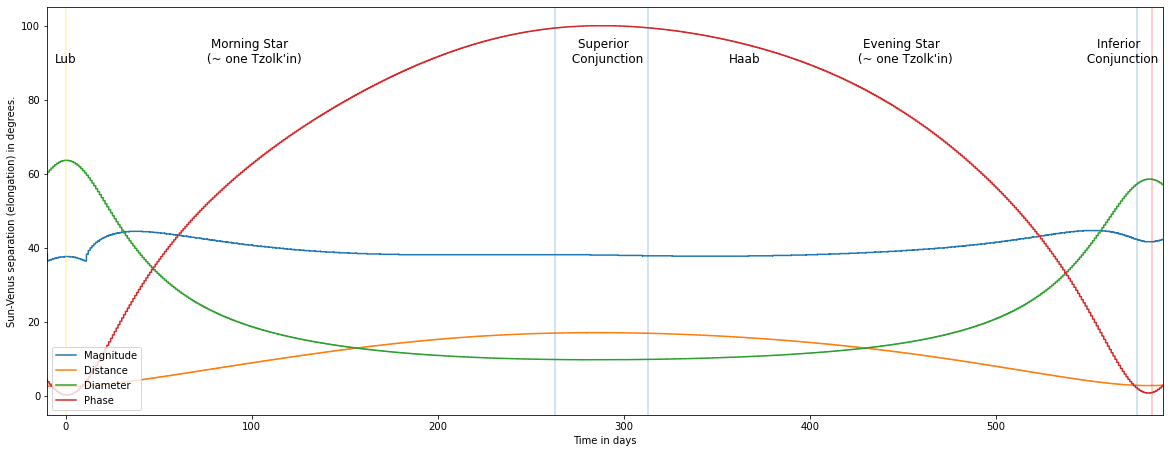

In [23]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, -10. * props[:,0], label='Magnitude')
ax.plot(sunrises,  10. * props[:,2], label='Distance')
ax.plot(sunrises,        props[:,1], label='Diameter')
ax.plot(sunrises,        props[:,3], label='Phase')    
    
ax.set_xlabel('Time in days')
ax.set_ylabel('Sun-Venus separation (elongation) in degrees.')

ax.set_xlim(left=-10, right=590)
        
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
yy = 90.
    
ax.text(x=0,   y=yy, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=yy, s='Morning Star \n (~ one Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=yy, s='Superior \n Conjunction', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=yy, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=yy, s='Evening Star \n (~ one Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=yy, s='Inferior \n Conjunction', horizontalalignment='center', fontsize=12)

ax.legend(frameon=True, loc=3)

It just so happens that the synodic period of Venus (584 days) relates to the orbital period of the earth (365 days) in a relatively simple ratio of 5:8. Five times the synodic period of Venus (5 x 584 days) is 2,920 days. If you divide 2,920 by the 365 days in our year, you get 8. In short, the motions of Venus relative to our sun repeat almost exactly every 8 years. Eight years was a fundamental interval for ancient Mayans, who relied heavily on natural cycles.

Let's see how the Mayans recorded this in 500 AD! 

In [24]:
# We'll calculate the angular position of Venus for each of the five synodic cycles (584 day) that's required for things to repeat.
cycles        = {}

In [25]:
for i in range(5):
  zero        = 584. * i

  # Sun is above the horizon.
  in_cycle    = (sunrises >= zero)        & (sunrises < zero + 585.) & (angular_pos[:,1] > 0.)

  in_morning  = (sunrises >= zero)        & (sunrises < zero + 263.) & (angular_pos[:,1] > 0.)
  in_superior = (sunrises >= zero + 263.) & (sunrises < zero + 313.) & (angular_pos[:,1] > 0.)
  in_evening  = (sunrises >= zero + 313.) & (sunrises < zero + 576.) & (angular_pos[:,1] > 0.)
  in_inferior = (sunrises >= zero + 576.) & (sunrises < zero + 584.) & (angular_pos[:,1] > 0.)

  cycles[i]   = [in_morning, in_superior, in_evening, in_inferior]

In [26]:
labels        = ['Morning Star', 'Superior', 'Evening Star', 'Inferior'] 

def plot_mayan(cycle, epoch, ext=None):
  fig, ax     = plt.subplots(1, 1, figsize=(15, 5.))

  im          = PImage.open('images/Mayan_Morning_{}.png'.format(cycle))  
    
  width, height = im.size

  size        = 256, 256
  im.thumbnail(size, PImage.ANTIALIAS)

  im          = np.array(im).astype(np.float) / 255 

  color       = color_cycle[cycle]
  sample      = cycles[cycle][epoch]
  label       = labels[epoch]

  # for i, (color, sample, label) in enumerate(zip(color_cycle, cycles[j], labels)):
  ax.plot(angular_pos[sample,2],    angular_pos[sample,3],    c=color, lw=0.0, marker='.', label=label)
  ax.plot(angular_pos[sample,2][0], angular_pos[sample,3][0], c='k', lw=0.0, marker='.')
  
  ax.legend(frameon=False, loc=1)
  
  ax.set_xlim(left=360., right=0.0)

  if ext is not None:
    title = 'Venus as a ' + label + ':  ' + ext

  else:
    title = 'Venus as a ' + label
    
  ax.set_title(title)
    
  fig.figimage(im, 320, 30)

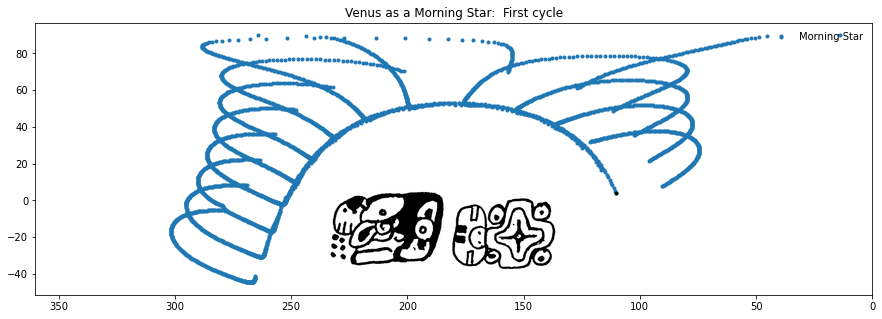

In [27]:
plot_mayan(0, 0, ext='First cycle')

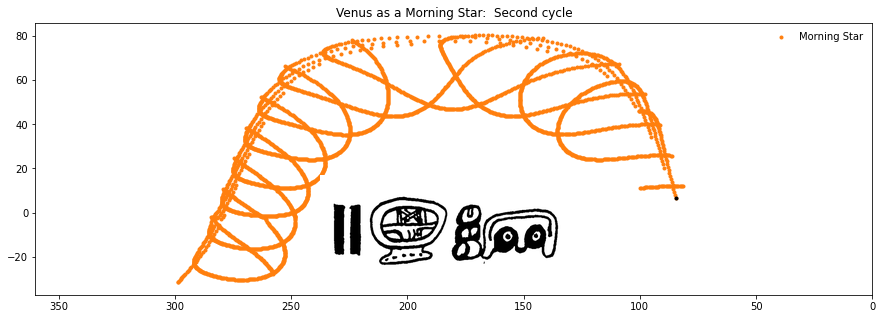

In [28]:
plot_mayan(1, 0, ext='Second cycle')

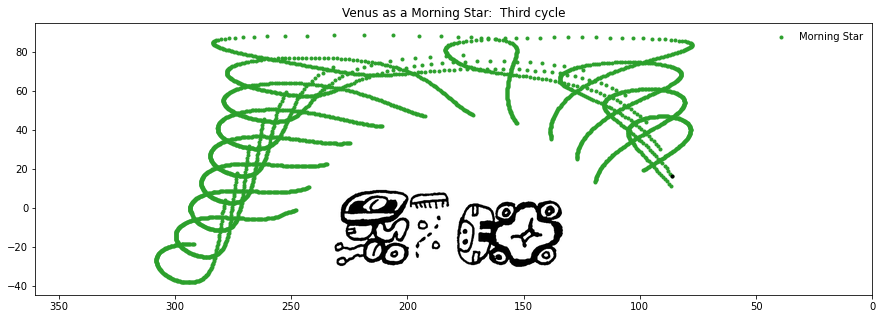

In [29]:
plot_mayan(2, 0, ext='Third cycle')

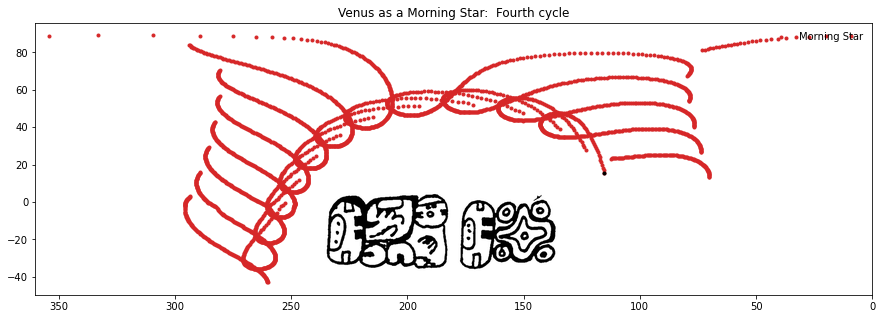

In [30]:
plot_mayan(3, 0, ext='Fourth cycle')

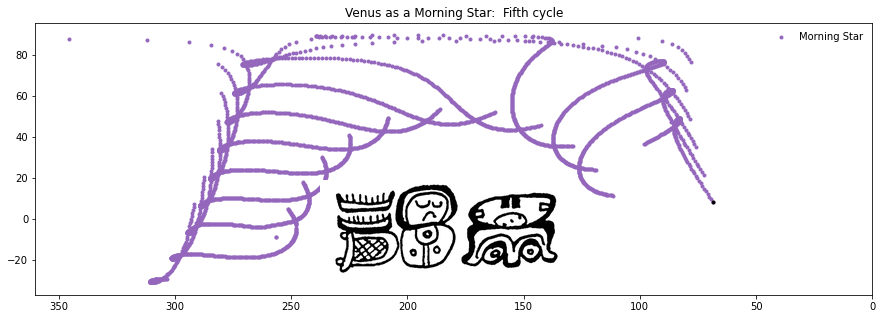

In [31]:
plot_mayan(4, 0, ext='Fifth cycle')

At this point, after eight years, Venus and the Sun return to the same point in the sky and the dance begins all over again!  The Mayans documented this behaviour religiously, in what is today known as the Dresden Codex:

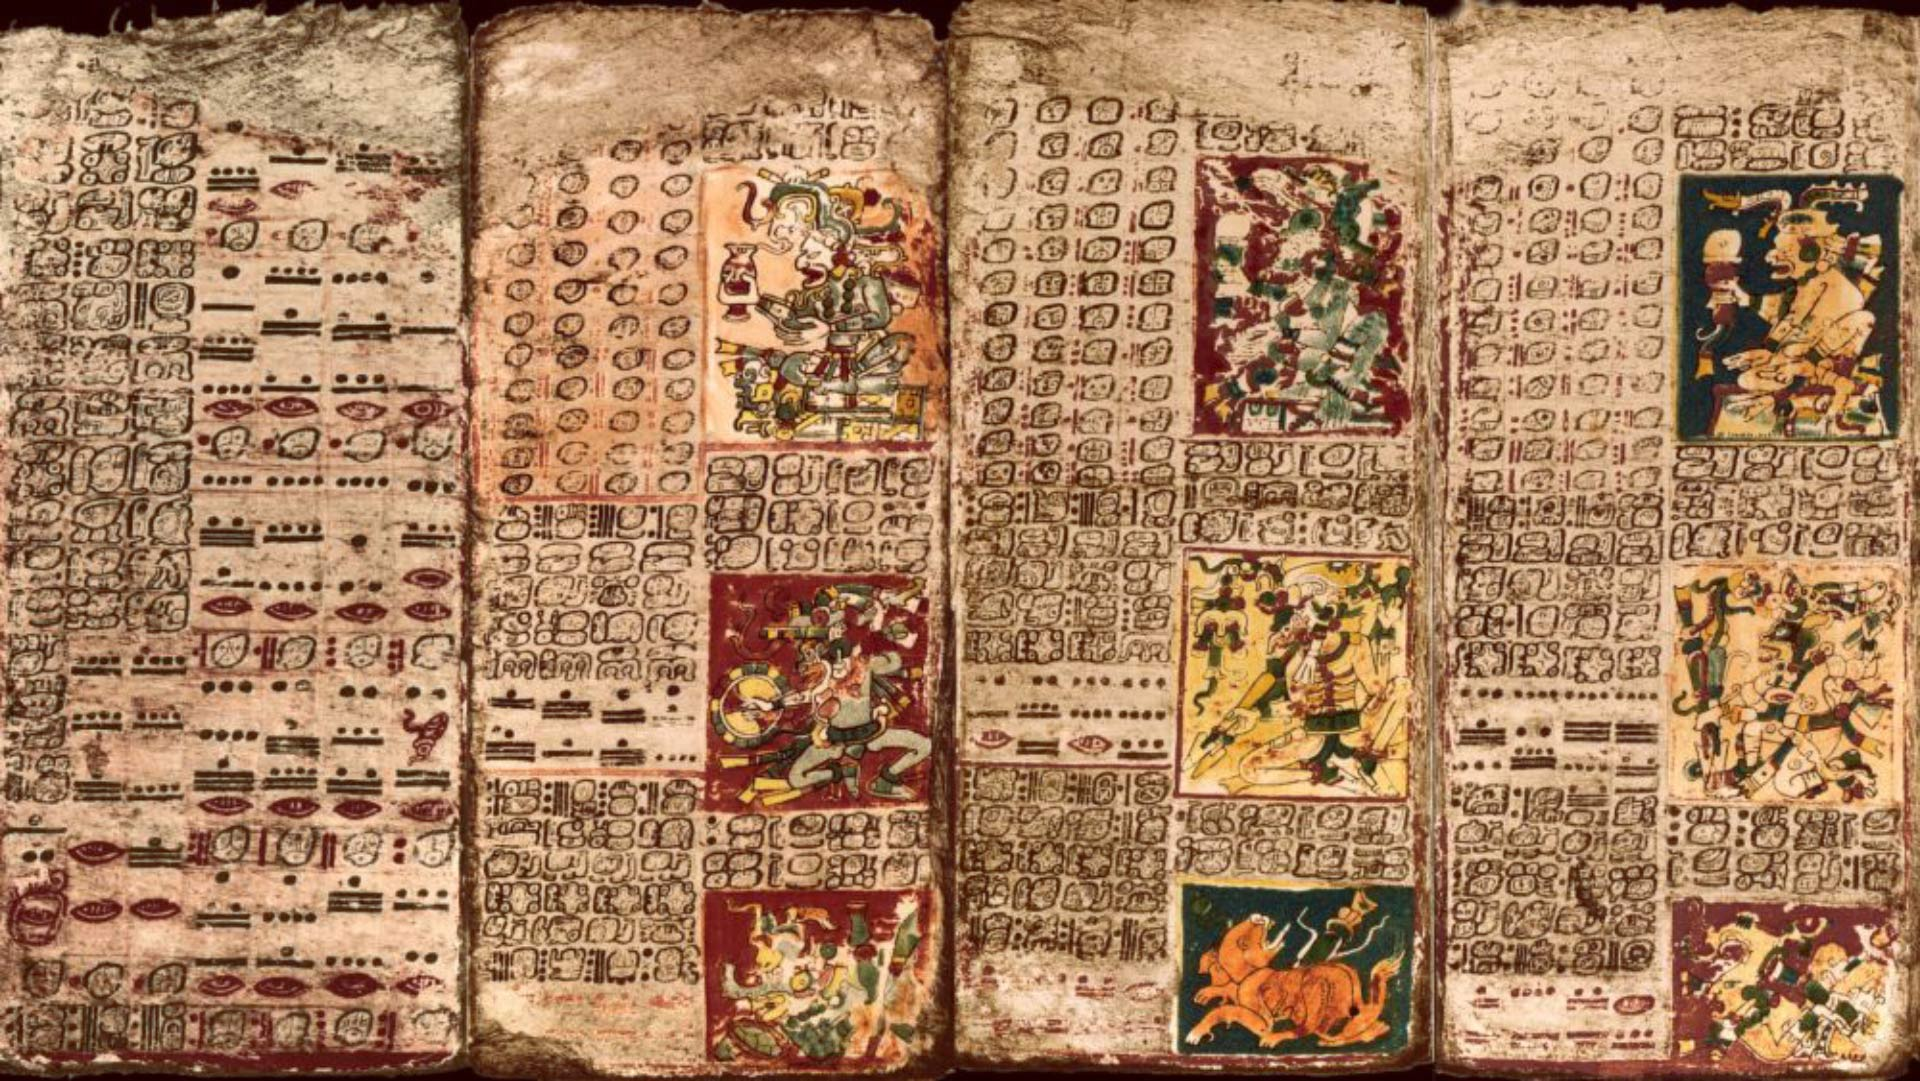

In [32]:
Image(filename='images/DresdenCodex.jpg')

For page after page, in the Codex, the Mayans recorded the dates at which Venus switched from a Morning Star, to a Superior Conjuction, to an Evening Star, to an Inferior Injunction and so on, with incredible accuracy.  Compared to modern accuracy, then were often within one to a few days!  The Mayans didn't do fractions, so it was hard to agree exactly.  

Each page would have a row of four dates, marking these transitions.  The same row on five consectutive pages would record these same transitions for the five synodic cycles (of 584 days) completing a Lub, or 2920 days, when the sun and venus would begin the same dance again. 

After thirteen lubs, or 104 Haab (years), the table returns to its Lubay or "great resting place" where all the cycles begin again - the sun and venus have returned to the starting positions on the first day of a Tzolk'in year.  The whole cycle then repeats itself.  The Universe must have seemed in perfect harmony with their world on that _Ahaw_ day when the Lubay was reached and the thirteen cycles of Venus begin again. 

In [33]:
# print(365. * 104, 260 * 146., 584. * 65., 2920. * 13)

# BREAKING NEWS (!)

Perhaps the Mayans were right all along!  In an unexpected twist, on Monday Sep. 14th 2020, scientists annnounced the first tantalising evidence for life on Venus - just in time for National Hispanic Month and the DESI High Challenge! 

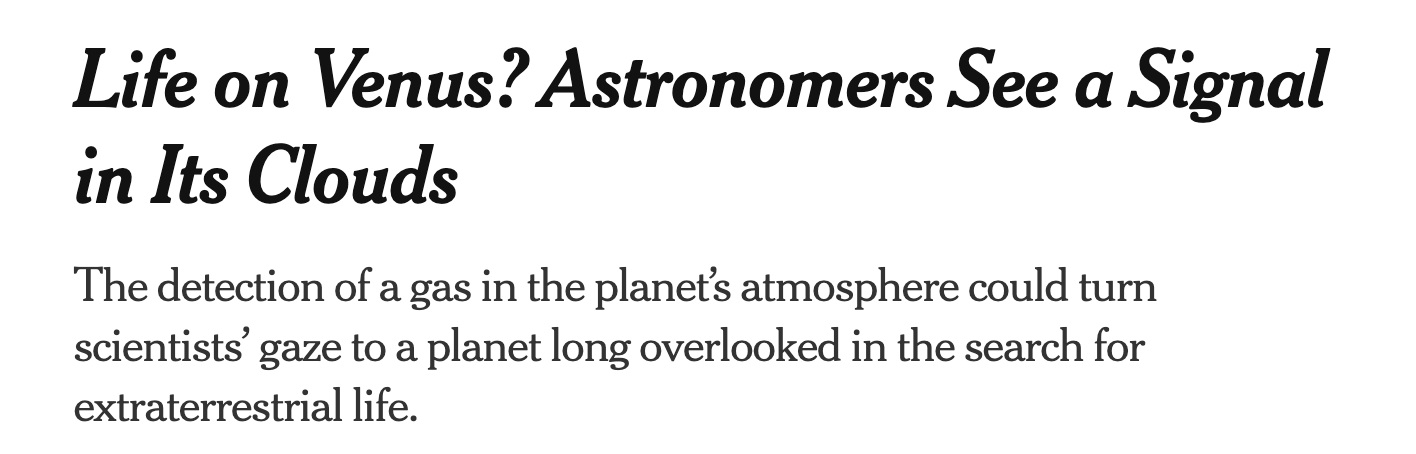

In [38]:
Image(filename='images/VenusLife.png')

Check out [here](https://www.nytimes.com/2020/09/14/science/venus-life-clouds.html) to start learning more.

# Hispanic Americans in DESI

This notebook is currently just an example of what you can do.  To make it much better, we'd like you to submit your own material!  This could add to the Mayan example above using pyephem, approach the work of the first professional Hispanic American astronomers or be a fun python experiment highlighting your work in DESI.  If you submit an entry, or even if you don't(!), add an introduction to yourself and your interests in our dedicated folder.  Alma and Mariana, our first DESI High translators (thank you!), have given examples ([here](https://github.com/michaelJwilson/DESI-HighSchool/blob/master/Espanol/Profiles/example.md) and here) to show you how.     

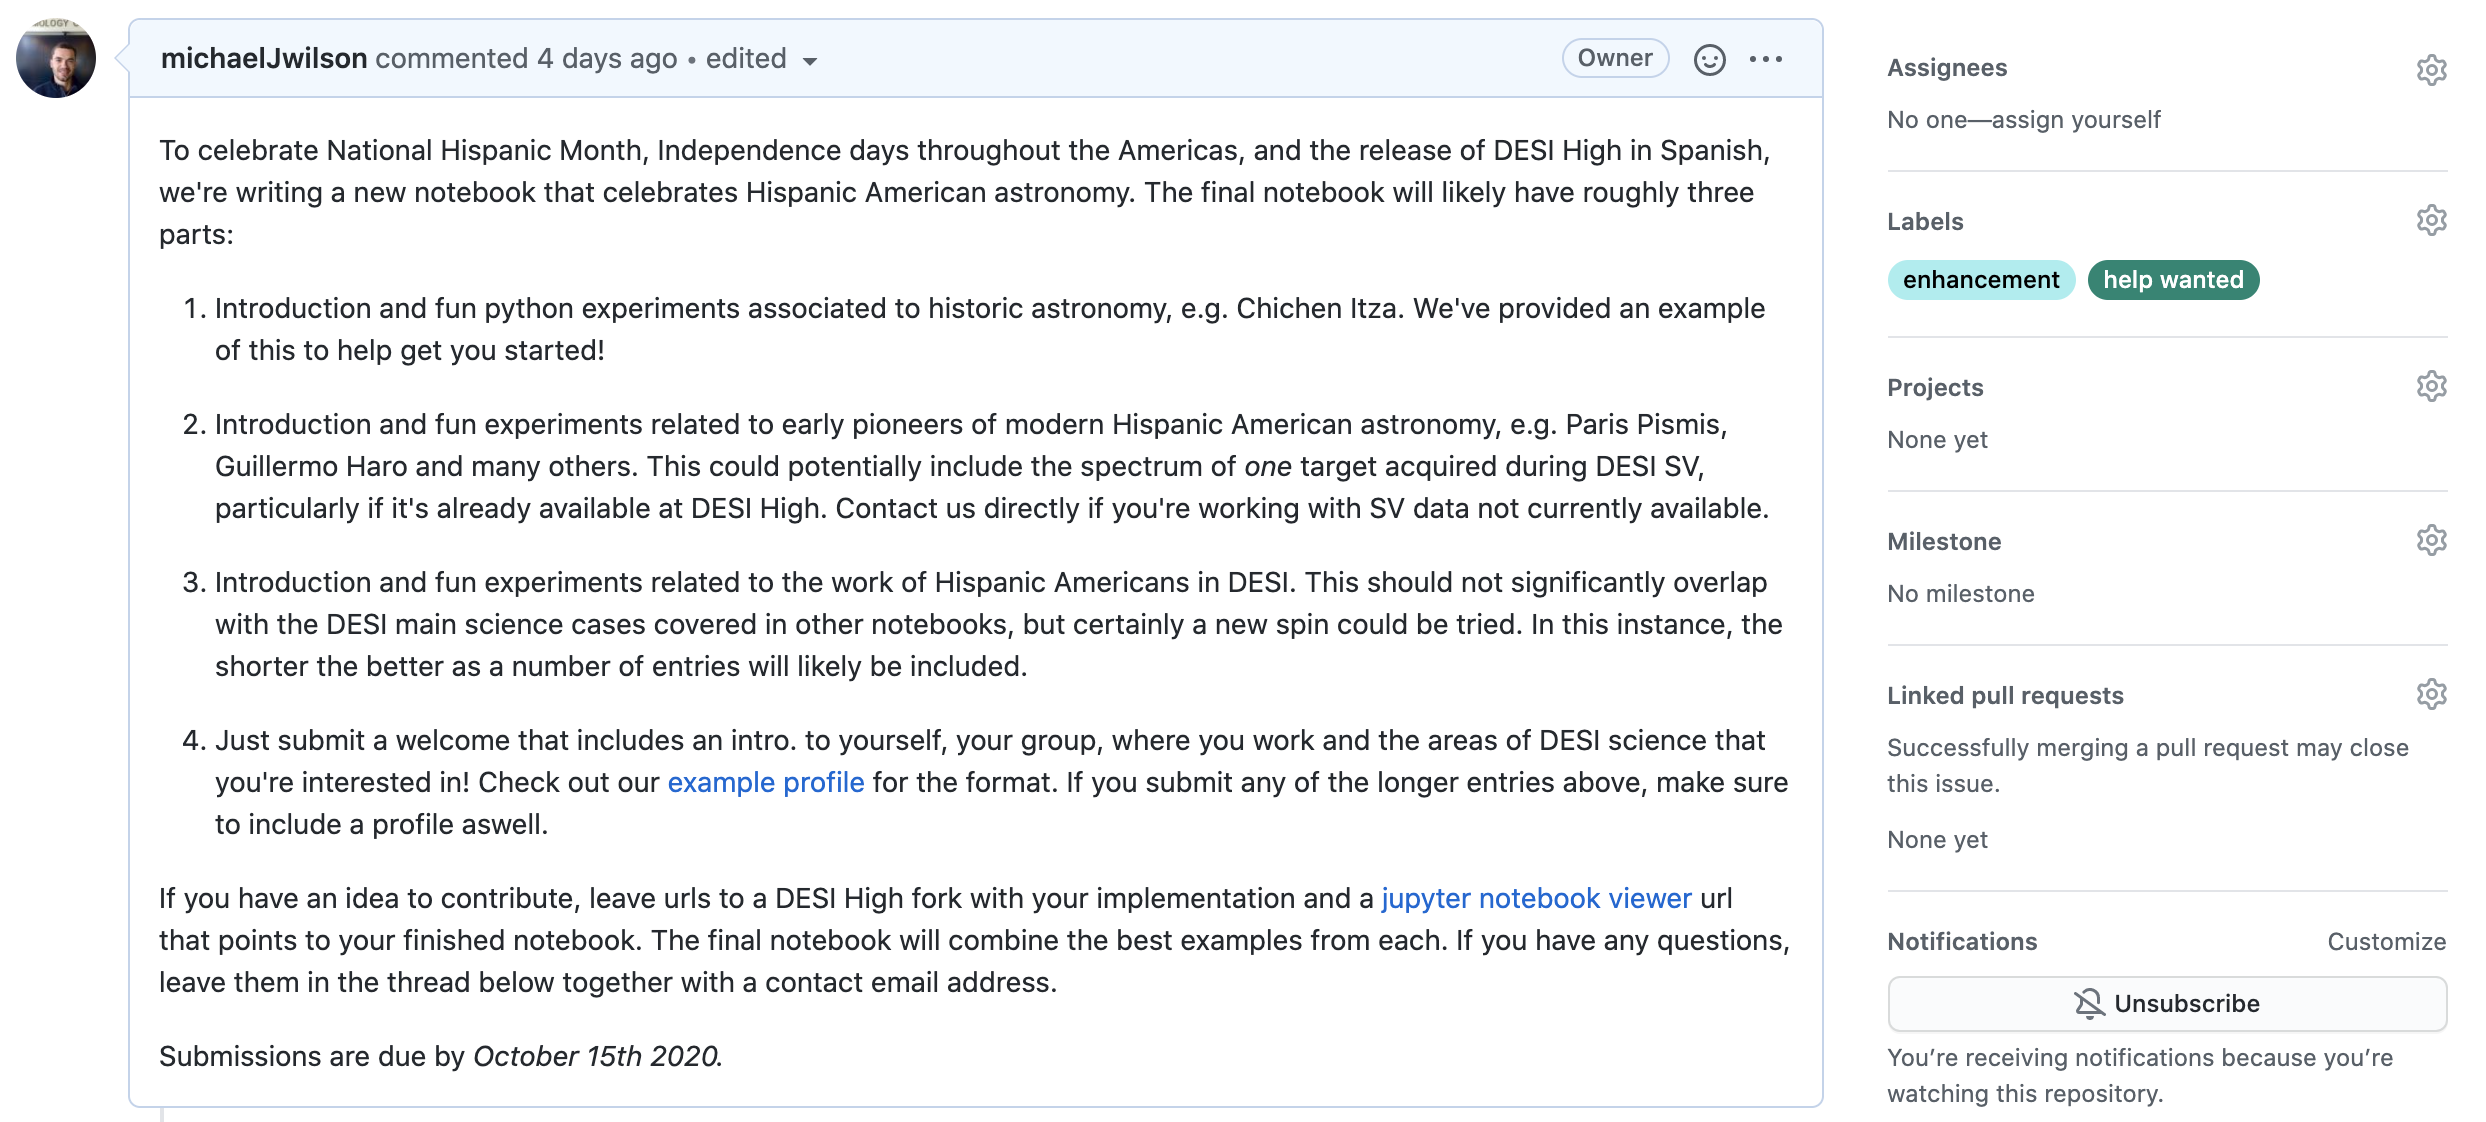

In [44]:
Image(filename='images/Challenge1.png')

Head over to https://github.com/michaelJwilson/DESI-HighSchool/issues/19 to get started!